In [ ]:
Connecting the notebook to my Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all the required libraries.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image taken from the google drive.

In [ ]:
# read the image
original_image = cv2.imread(r'/content/drive/MyDrive/rice_images/full_grain_small.jpg')

In the next cell, I sharpened the input image(the reasons are all specified in the summary).

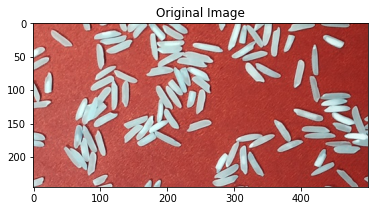

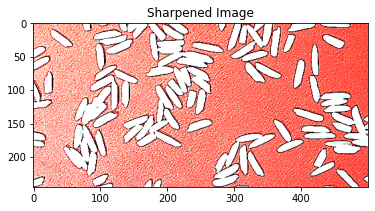

In [ ]:
plt.title("Original Image")
plt.imshow(original_image)
plt.show()
img = original_image

k1=-1                       # can be tuned to change the degree to which we want to sharpen the image, it has to be negative only
k2=-9*k1+1                  # and because, the net sum of the kernel has to be 1, we have to assign a value to k2, as a funtion of k1 only

kernel_sharpening = np.array([[k1,k1,k1],             # the kernel we will use to sharpen the image
                              [k1, k2,k1],
                              [k1,k1,k1]])

# applying the sharpening kernel to the input image & displaying it.
sharpened_image = cv2.filter2D(original_image, -1, kernel_sharpening)
plt.title("Sharpened Image")
plt.imshow(sharpened_image)
plt.show()

image = image1


Conversion from BGR to first RGB and then to a grayscale image.

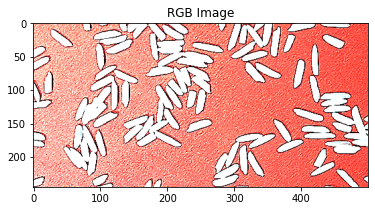

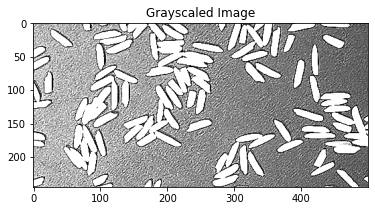

In [ ]:
# convert to RGB from BGR
rgb_image = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)
plt.title("RGB Image")
plt.imshow(image)
plt.show()

# convert to grayscale from RGB
grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
plt.title("Grayscaled Image")
plt.imshow(grayscale_image, cmap='gray')

Thresholding of the grayscale image, to convert it to a binary image(black and white image).


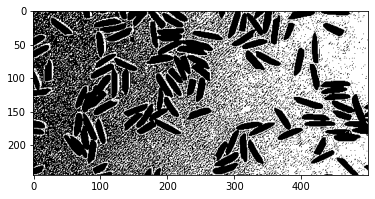

In [ ]:
# create a binary thresholded image
_, binary_image1 = cv2.threshold(grayscale_image, 150, 170, cv2.THRESH_BINARY_INV)            # 150, 170 - minVal, maxVal - threshold values.
# show it
plt.imshow(binary_image1, cmap="gray")
plt.show()

The values used for converting the image to a binary image seem to be inappropriate for the task, we need the image for. Hence I need to regualte the threshold values so that I get a better binary image - lesser noise in the image.




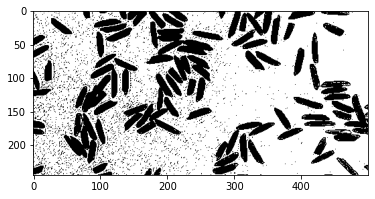

In [ ]:
# create a binary thresholded image
_, binary_image2 = cv2.threshold(grayscale_image, 250, 255, cv2.THRESH_BINARY_INV)          # new threshold values - 250, 255
# show it
plt.imshow(binary_image2, cmap="gray")
plt.show()

The values taken above seem to have worked much better than before on the image. But still we need to remove the noise in the image, for which I have used the OpenCV function - cv2.medianBlur(), which removes the salt and pepper noise in an image.

My work on it - https://github.com/Parth1211/Image-Noising-Denoising/blob/main/Noise_Removal.ipynb

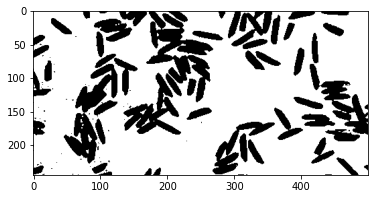

In [ ]:
salt_papper_noise_removed = cv2.medianBlur(binary_image2, 3)
binary = salt_papper_noise_removed
plt.imshow(binary, cmap="gray")
plt.show()

The cell below is the key cell after the preprocessing of the image, as it has the function - cv2.findContours(), whoch finds the contours in the image and then draws them on the image using - cv2.drawContours().

In [ ]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# draw all contours
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

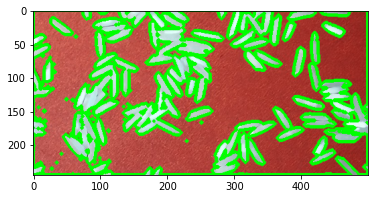

In [ ]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

We get total number of contours next -  

In [ ]:
type(contours)

number_of_objects_in_image= len(contours)

print ("The number of objects in this image: ", str(number_of_objects_in_image))

The number of objects in this image:  108


#Summary
Through this, we could find the number of rice grains in this image, it could have been any other object as well(ball, stars in the night sky etc). 
###This was the procedure I followed-

1) Loading image from the drive, and then passing it through the sharpening kernel(*)(this reason will be explained later on).

2) Converting the BGR image to RGB image, as we use RGB images in processing.

3) And then we convert it to aa grayscale image, as we would be needing a binary(black and white image), for better result. 

4) Then on converting it to binary image I found out a lot of noise in the image, as the "threshhold" values set in the filter for it to convert to binary image were too low, that is, the values of gray pixels(0-255) for which it was convreting them to black pixels was too low. Therefore, I regulated the values to the extent till which I could remove most of the noise, the rice grains being uneffected.

5) Still, a lot of noise was visible in the image, hence I passed it through the median removal kernel, which removes Salt and Pepper noise(the type of noise my image had). And then I got the final image, I worked upon.

6) Then finally I used the OpenCV function cv2.findContours(), which as the name says, finds contours on the objects in the blaack and white image I had prepared, and then cv2.drawContours() draws contours that it recorded by the previous function, on the image we pass through it. cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE are the 2 parameters of cv2.findContours() which I used to store contours of my image. And then I printed the number of contours(according to the function).

(*) - There are some rice grains that are very close to each other, and they have shared borders. Hence by sharpening the images, I reduced the number of such shared borders, which would have caused problem while detection of contours.
### Scope of improvement-

I can still see that some rice grains which are very close to each other are being counted as a single cotnours, though I have decreased such an error to a great extent by the point(*) I mentioned above. And there is still some noise in the image, due to which there is an increase in the number of contours being detected, we can also think of reducing that to some more extent(some further proccesing in my point 5th point ).

Right now the **model predicts the number of rice grains to be 108**, and after counting it **manually I found out 116 rice grains**. Hence we can conclude that the model is performing well, to a good extent.

